In [166]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM, Conv2D, MaxPooling2D, \
    Lambda, Flatten, Embedding, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.keras.utils import register_keras_serializable
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import cv2
import matplotlib.pyplot as plt
import deepdish as dd

In [167]:
file_path = '/media/tasos/TOSHIBA EXT/da-tacos_coveranalysis_subset_single_files/W_14/P_15.h5'
P_15_data = dd.io.load(file_path)

In [169]:
print(type(P_15_data))
print('Features:')
print(P_15_data.keys())

# check the features
print('\nFeature types:')
for key, value in zip(P_15_data.keys(), P_15_data.values()):
    print(f"Feature: {key}, Type: {type(value)}")

<class 'dict'>
Features:
dict_keys(['chroma_cens', 'crema', 'hpcp', 'key_extractor', 'madmom_features', 'mfcc_htk', 'tags', 'label', 'track_id'])

Feature types:
Feature: chroma_cens, Type: <class 'numpy.ndarray'>
Feature: crema, Type: <class 'numpy.ndarray'>
Feature: hpcp, Type: <class 'numpy.ndarray'>
Feature: key_extractor, Type: <class 'dict'>
Feature: madmom_features, Type: <class 'dict'>
Feature: mfcc_htk, Type: <class 'numpy.ndarray'>
Feature: tags, Type: <class 'list'>
Feature: label, Type: <class 'numpy.str_'>
Feature: track_id, Type: <class 'numpy.str_'>


In [171]:
chroma = P_15_data['chroma_cens']
print(f'shape of chroma_ces feature: {chroma.shape}')

shape of chroma_ces feature: (12067, 12)


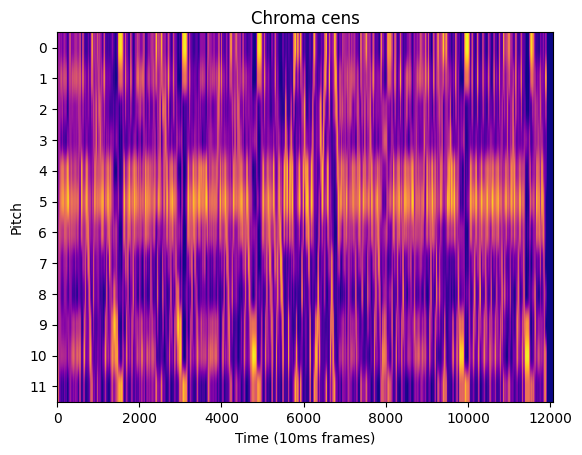

In [173]:
# plot chroma_cens image
plt.imshow(np.rot90(chroma), aspect='auto', cmap='plasma')
plt.xlabel("Time (10ms frames)")
plt.ylabel("Pitch")
plt.yticks(list(range(12)))
plt.title('Chroma cens')
plt.show()

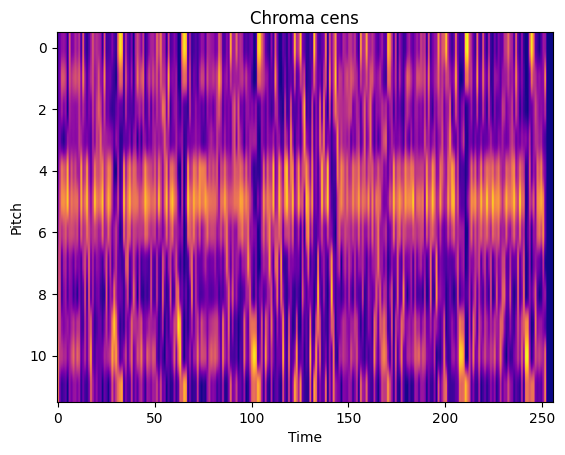

In [174]:
# rersizing seems ok to keep important information

resized_chroma = cv2.resize(np.rot90(chroma), (256, 12))
plt.imshow(resized_chroma, aspect='auto', cmap='plasma')
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.title('Chroma cens')
plt.show()

In [176]:
# more rythmic information
crema = P_15_data['crema']
print(f'shape of crema feature: {crema.shape}')

shape of crema feature: (12, 12066)


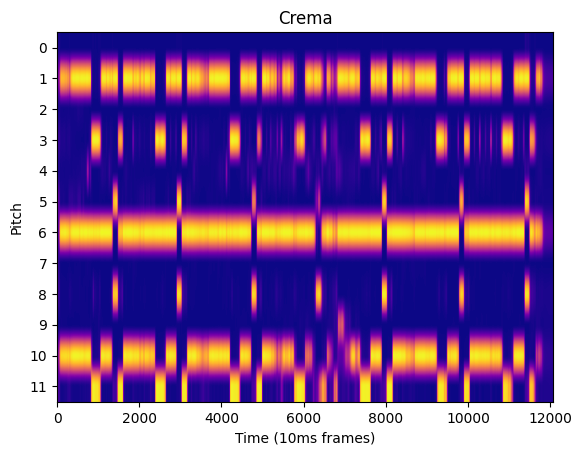

In [177]:
plt.imshow(crema, aspect='auto', cmap='plasma')
plt.xlabel("Time (10ms frames)")
plt.ylabel("Pitch")
plt.yticks(list(range(12)))
plt.title('Crema')
plt.show()

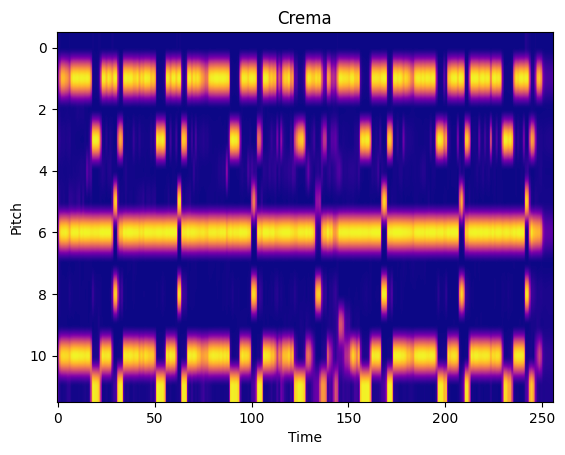

In [178]:
# same here

resized_crema = cv2.resize(crema, (256, 12))
plt.imshow(resized_crema, aspect='auto', cmap='plasma')
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.title('Crema')
plt.show()

In [179]:
hpcp = P_15_data['hpcp']
print(f'shape of hpcp feature: {hpcp.shape}')

shape of hpcp feature: (12067, 12)


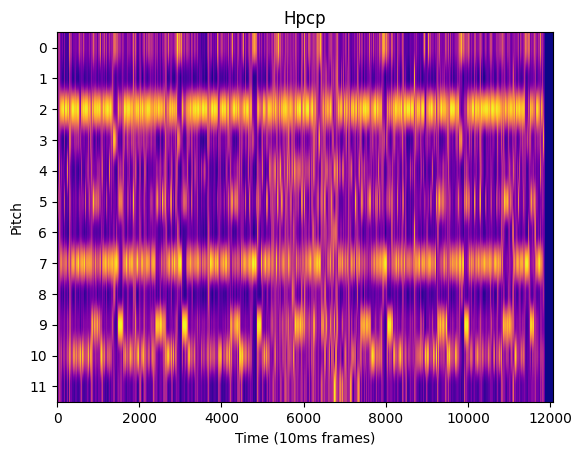

In [180]:
plt.imshow(np.rot90(hpcp), aspect='auto', cmap='plasma')
plt.xlabel("Time (10ms frames)")
plt.ylabel("Pitch")
plt.yticks(list(range(12)))
plt.title('Hpcp')
plt.show()

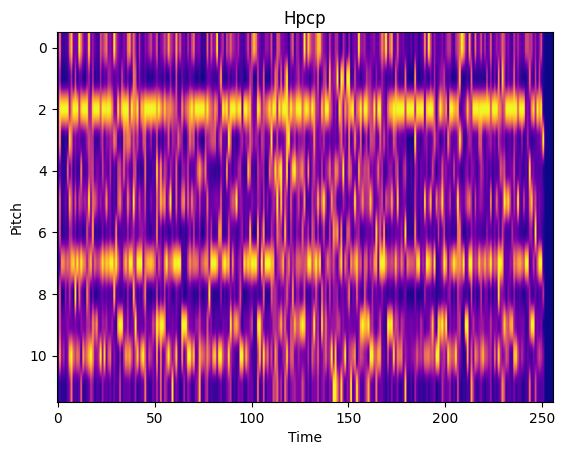

In [181]:
resized_hpcp = cv2.resize(np.rot90(hpcp), (256, 12))
plt.imshow(resized_hpcp, aspect='auto', cmap='plasma')
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.title('Hpcp')
plt.show()

In [183]:
# key features are basically text (and a float 'strength' which doesnt seem important)

key_features = P_15_data['key_extractor']

print('Key feature types')
for key, value in zip(key_features.keys(), key_features.values()):
    print(f"Feature: {key}, Type: {type(value)}")

print('\nSample key features')
print(key_features)

Key feature types
Feature: key, Type: <class 'numpy.str_'>
Feature: scale, Type: <class 'numpy.str_'>
Feature: strength, Type: <class 'numpy.float64'>

Sample key features
{'key': 'F#', 'scale': 'major', 'strength': 0.9479038715362549}


In [184]:
madmom = P_15_data['madmom_features']

print('Madmom feature types')
for key, value in zip(madmom.keys(), madmom.values()):
    print(f"Feature: {key}, Type: {type(value)}")

Madmom feature types
Feature: novfn, Type: <class 'numpy.ndarray'>
Feature: onsets, Type: <class 'numpy.ndarray'>
Feature: snovfn, Type: <class 'numpy.ndarray'>
Feature: tempos, Type: <class 'numpy.ndarray'>


------Novfn------
shape: (12067,)

Sample first 100 values
[0.00285308 0.00250567 0.00397223 0.00938005 0.03016013 0.11857688
 0.33764756 0.31755072 0.11428503 0.03827569 0.01601147 0.0072381
 0.00361983 0.00209323 0.0014859  0.00131299 0.00133517 0.00141785
 0.00150357 0.00156172 0.0015998  0.00164787 0.00172877 0.00183303
 0.00191976 0.001998   0.00214801 0.00240913 0.0027087  0.00302538
 0.00328219 0.00332691 0.00325433 0.00318244 0.00327525 0.00353693
 0.00371478 0.0036348  0.00351449 0.0035152  0.00371537 0.00443619
 0.0062004  0.01002261 0.01775517 0.03222578 0.05496501 0.06554083
 0.04333337 0.0261648  0.02180093 0.02210179 0.02600691 0.03369379
 0.04084202 0.03800083 0.02951607 0.0238888  0.02031608 0.01838631
 0.01803794 0.01794995 0.01721455 0.01800447 0.02340477 0.03650627
 0.04849739 0.04283946 0.0271111  0.02022289 0.01779608 0.01849937
 0.02582876 0.04553287 0.08796719 0.13368231 0.13366618 0.090716
 0.04922993 0.02767026 0.01666611 0.01097496 0.00850958 0.00752508
 0.007

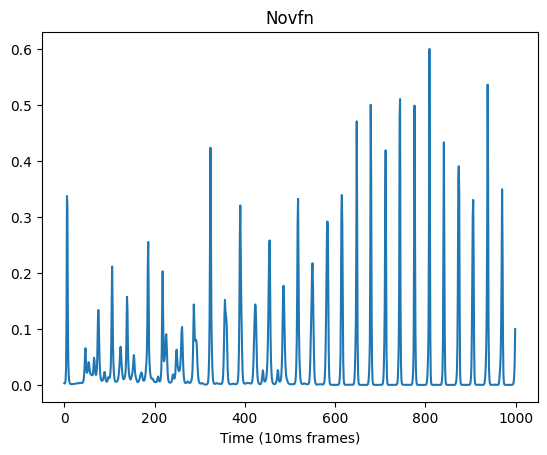

In [187]:
novfn = madmom['novfn']
print('------Novfn------')
print(f'shape: {novfn.shape}')

print('\nSample first 100 values')
print(novfn[:100])
print(f'\nValues range: {novfn.min()} - {novfn.max()}')

plt.plot(novfn[:1000])
plt.xlabel("Time (10ms frames)")
plt.title('Novfn')

# the timeframes where there are peaks match with the onsets array (below feature)
print(f'\nPeaks: {np.where(novfn>0.05)[0][:50]}')

In [188]:
# Timesteps when a new note is played

onsets = madmom['onsets']

print('------Onsets------')
print(f'shape: {onsets.shape}')

print('\nSample first 100 values')
print(onsets[:100])

------Onsets------
shape: (368,)

Sample first 100 values
[   6   42   76  111  148  183  218  252  288  324  356  390  423  455
  486  518  550  583  615  648  680  711  743  776  809  841  873  906
  938  970 1003 1034 1066 1098 1132 1165 1197 1229 1262 1295 1326 1359
 1392 1424 1457 1489 1521 1551 1583 1616 1648 1681 1713 1746 1777 1811
 1842 1875 1910 1941 1975 2007 2040 2072 2104 2137 2170 2202 2235 2267
 2300 2331 2363 2397 2430 2463 2494 2525 2558 2590 2623 2655 2688 2721
 2753 2786 2818 2850 2882 2914 2947 2980 3012 3042 3076 3108 3139 3171
 3203 3237]


In [189]:
# calculate the intervals
onsets_intervals = np.concatenate(([onsets[0]], np.diff(onsets)))
print(onsets_intervals[:100])


# all intervals are almost the same, so we are gonna use just the mean
print(f'\nmean onset interval: {onsets_intervals.mean()}')

[ 6 36 34 35 37 35 35 34 36 36 32 34 33 32 31 32 32 33 32 33 32 31 32 33
 33 32 32 33 32 32 33 31 32 32 34 33 32 32 33 33 31 33 33 32 33 32 32 30
 32 33 32 33 32 33 31 34 31 33 35 31 34 32 33 32 32 33 33 32 33 32 33 31
 32 34 33 33 31 31 33 32 33 32 33 33 32 33 32 32 32 32 33 33 32 30 34 32
 31 32 32 34]

mean onset interval: 32.71739130434783


------Snovfn------
shape: (12067,)

Sample first 100 values
[0.         0.00195367 0.00251332 0.01977683 0.39724378 3.2814113
 3.05427191 1.63328967 0.91465985 0.26885138 0.00018218 0.00001472
 0.00000805 0.00008958 0.00000589 0.00001359 0.00000005 0.00000001
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00024045
 0.00114521 0.00059095 0.00045212 0.00134495 0.00494544 0.00711374
 0.00939513 0.0928885  0.26853589 0.35880673 0.67422309 0.67699844
 0.23475827 0.16126272 0.22279431 0.48147615 0.58276132 0.73857455
 1.08358971 1.00546733 0.92897324 1.06709802 0.51154744 0.42847713
 1.48857691 1.23147991 0.70623597 0.75427455 0.5664148  2.91956899
 5.71527093 3.67623086 1.44652419 1.22102393 0.93968583 0.4625636
 0.24932031 0.53780104 1.28541241 6.50346878 4.05451195 1.69549396
 1.31049893 0.65722155 0.78559125 0.77017238 0.74507094 0.5938026
 0.6064005  0.4620649

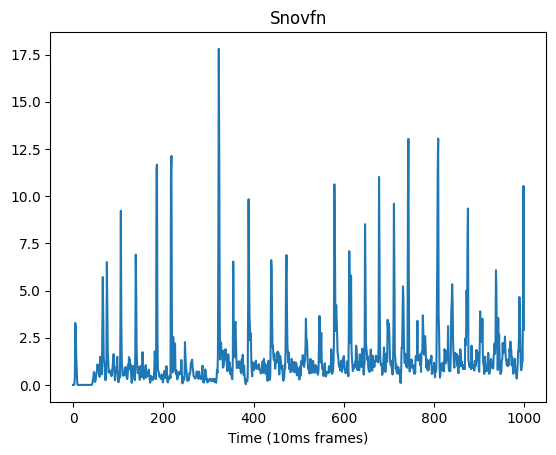

In [191]:
snovfn = madmom['snovfn']
print('------Snovfn------')
print(f'shape: {snovfn.shape}')

print('\nSample first 100 values')
print(snovfn[:100])
print(f'\nValues range: {snovfn.min()} - {snovfn.max()}')

plt.plot(snovfn[:1000])
plt.xlabel("Time (10ms frames)")
plt.title('Snovfn')
print(f'Peaks: {np.where(novfn>0.1)[0][:50]}')

In [192]:
tempos = madmom['tempos']
print('------Tempos------')
print(f'shape: {tempos.shape} \n')

print(tempos)

# get the weighted average
tempo = sum(tempos[:,0]*tempos[:,1])
print(f'\n Tempo: {tempo} (weighted average)')

------Tempos------
shape: (9, 2) 

[[157.89473684   0.30011974]
 [ 78.94736842   0.22652955]
 [ 52.63157895   0.17144675]
 [105.26315789   0.08647591]
 [ 63.15789474   0.06461099]
 [ 45.11278195   0.04592117]
 [ 40.26845638   0.0458176 ]
 [240.           0.03023864]
 [117.64705882   0.02883965]]

 Tempo: 102.04498256816966 (weighted average)


In [193]:
# Self similarity mfcc

mfcc_htk = P_15_data['mfcc_htk']
print(f'shape: {mfcc_htk.shape}')
print(mfcc_htk)

print(f'\nnan values: {np.isnan(mfcc_htk).sum()}')
print(f'inf values: {np.isinf(mfcc_htk).sum()}')

shape: (13, 12023)
[[ 20.48409     19.175129    17.732105   ...         -inf         -inf
          -inf]
 [  0.32151002   0.3414958    0.35830727 ...          nan          nan
           nan]
 [ -0.1424449   -0.13525887  -0.12928689 ...          nan          nan
           nan]
 ...
 [  1.5253475    1.4343758    1.3603406  ...          nan          nan
           nan]
 [ -1.7252938   -1.8222946   -1.9166079  ...          nan          nan
           nan]
 [-11.987957   -12.003521   -12.009966   ...          nan          nan
           nan]]

nan values: 2340
inf values: 195


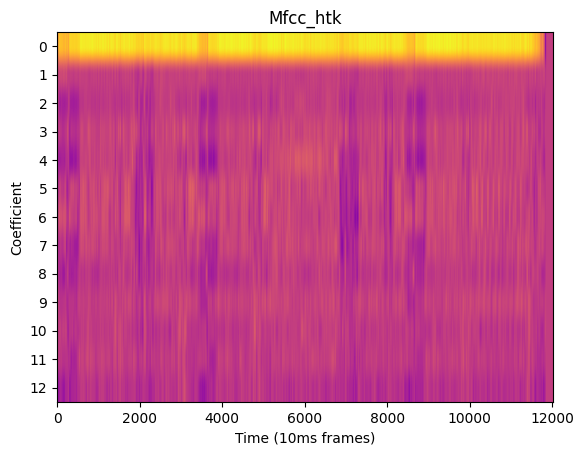


Values range: -53.20770263671875 - 60.449684143066406


In [194]:
# set nans and infs to zero (they are either on the first or the last columns)
# in the sample shown below all nans are in the last columns
# probably it has to do with the silence in the staring or ending of songs

mfcc_htk[np.isnan(mfcc_htk)] = 0
mfcc_htk[np.isinf(mfcc_htk)] = 0
plt.imshow(mfcc_htk, aspect='auto', cmap='plasma')
plt.xlabel("Time (10ms frames)")
plt.ylabel("Coefficient")
plt.yticks(list(range(13)))
plt.title('Mfcc_htk')
plt.show()

print(f'\nValues range: {mfcc_htk.min()} - {mfcc_htk.max()}')

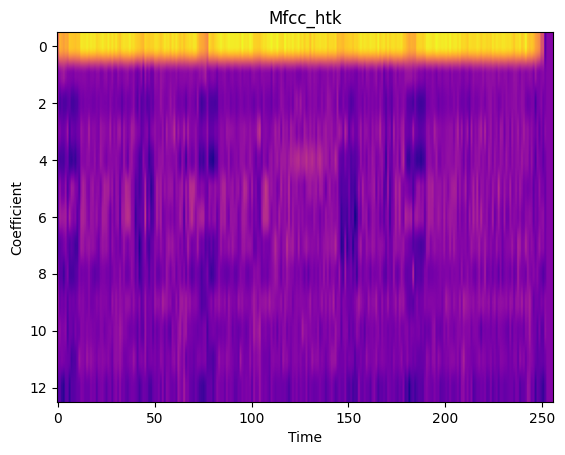

In [195]:
resized_mfcc_htk = cv2.resize(mfcc_htk, (256, 13))
plt.imshow(resized_mfcc_htk, aspect='auto', cmap='plasma')
plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title('Mfcc_htk')
plt.show()

In [196]:
tags = P_15_data['tags']
print(f'{'Tag' : <18} Certainty\n')

for pair in tags:
    print(f'{pair[0] : <20}: {pair[1]}')

Tag                Certainty

rock                : 0.070
pop                 : 0.041
alternative         : 0.042
indie               : 0.046
electronic          : 0.039
female vocalists    : 0.100
dance               : 0.009
00s                 : 0.011
alternative rock    : 0.011
jazz                : 0.331
beautiful           : 0.025
metal               : 0.007
chillout            : 0.029
male vocalists      : 0.008
classic rock        : 0.010
soul                : 0.028
indie rock          : 0.008
Mellow              : 0.049
electronica         : 0.014
80s                 : 0.011
folk                : 0.198
90s                 : 0.015
chill               : 0.022
instrumental        : 0.065
punk                : 0.002
oldies              : 0.003
blues               : 0.064
hard rock           : 0.004
ambient             : 0.038
acoustic            : 0.106
experimental        : 0.031
female vocalist     : 0.012
guitar              : 0.058
Hip-Hop             : 0.016
70s               

In [197]:
label = P_15_data['label']
print(f'Work: {label} (original song)')

track_id = P_15_data['track_id']
print(f'Track id: {track_id} (performance, could be cover or the original)')

Work: W_14 (original song)
Track id: P_15 (performance, could be cover or the original)


In [198]:
def preprocess(data):
    # resize and stack chroma_cens, crema and hpcp image features
    chroma_cens = np.rot90(data['chroma_cens']) # (12, timeframes)
    chroma_cens = cv2.resize(chroma_cens, (256, 12))
    crema = data['crema']                       # (12, timeframes)
    crema = cv2.resize(crema, (256, 12))
    hpcp = np.rot90(data['hpcp'])               # (12, timeframes)
    hpcp = cv2.resize(hpcp, (256, 12))

    image_features = np.stack([chroma_cens, crema, hpcp], axis=-1)  # (256, 256, 3)

    # handle mfcc_htk as a separate image feature
    mfcc_htk = data['mfcc_htk']    
    mfcc_htk[np.isnan(mfcc_htk)] = 0
    mfcc_htk[np.isinf(mfcc_htk)] = 0
    mfcc_htk_feature = cv2.resize(mfcc_htk, (256, 13)).reshape(13, 256, 1)

    # categorical features
    key = data['key_extractor']['key']
    scale = data['key_extractor']['scale']
    key_scale_feature = key + scale
    
    # numerical features
    numerical_features = []

    # calculate mean onsets interval (first numerical feature)
    madmom = data['madmom_features']
    onsets_feature = madmom['onsets']
    onsets_intervals = np.concatenate(([onsets[0]], np.diff(onsets)))
    mean_onset_interval = onsets_intervals.mean()
    numerical_features.append(mean_onset_interval)

    # calculate weighted mean of tempos (second numerical feature)
    tempos = madmom['tempos']
    tempo_feature = sum(tempos[:,0]*tempos[:,1])
    numerical_features.append(tempo_feature)

    # tags probabilities (numerical features 2-51)
    tags = data['tags']
    for tag in tags:
        numerical_features.append(tag[1])

    # label (id of original song)
    label = data['label']
        
    return image_features, mfcc_htk_feature, key_scale_feature, numerical_features, label

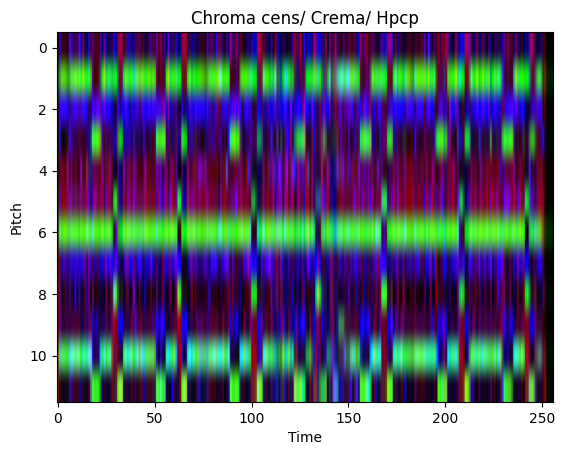

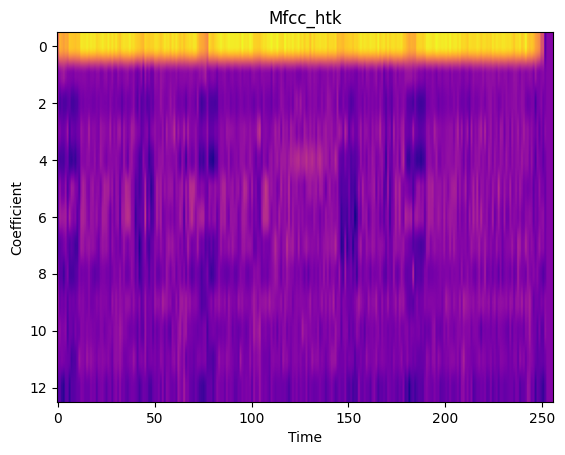

key_scale: F#major
numerical features: 
[32.71739130434783, 102.04498256816966, '0.070', '0.041', '0.042', '0.046', '0.039', '0.100', '0.009', '0.011', '0.011', '0.331', '0.025', '0.007', '0.029', '0.008', '0.010', '0.028', '0.008', '0.049', '0.014', '0.011', '0.198', '0.015', '0.022', '0.065', '0.002', '0.003', '0.064', '0.004', '0.038', '0.106', '0.031', '0.012', '0.058', '0.016', '0.008', '0.002', '0.018', '0.015', '0.004', '0.001', '0.011', '0.005', '0.003', '0.024', '0.003', '0.013', '0.004', '0.014', '0.004', '0.002']
Original song id: W_14


In [199]:
# Check preprocessed data

image_features, mfcc_htk_feature, key_scale_feature, numerical_features, label = preprocess(P_15_data)

plt.imshow(image_features, aspect='auto', cmap='plasma')
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.title('Chroma cens/ Crema/ Hpcp')
plt.show()

plt.imshow(mfcc_htk_feature, aspect='auto', cmap='plasma')
plt.xlabel("Time")
plt.ylabel("Coefficient")
plt.title('Mfcc_htk')
plt.show()

print(f'key_scale: {key_scale_feature}')
print(f'numerical features: \n{numerical_features}')
print(f'Original song id: {label}')

In [200]:
# Load dataset

# we are going to have a separate input for each feature, so our dataset will consist of 4 different arrays.

# Append the features of each sample to the corresponding lists (at the end they will be casted to arrays)
# Returns the label of the sample 
def add_features_to_lists(image_features, mfcc_htk_features, key_scale_features, \
                          numerical_features, data):
    sample_image_features, sample_mfcc_htk_feature, sample_key_scale_feature, \
            sample_numerical_features, sample_label = preprocess(data)
    image_features.append(sample_image_features)
    mfcc_htk_features.append(sample_mfcc_htk_feature)
    key_scale_features.append(sample_key_scale_feature)
    numerical_features.append(sample_numerical_features)

    #return the label for comparison with next sample
    return sample_label
    
# Returns data as pairs with their corresponding labels
# That is 9 arrays, 4 for the different features of the 1st input of the model
# 4 arrays for the features of the 2dn input
# and 1 array with the labels (0-> pair of similar songs, 1-> pair of dissimilar songs)
def load_dataset(no_of_samples = 100):
    data_path = '/media/tasos/TOSHIBA EXT/da-tacos_coveranalysis_subset_single_files/'
    dirs = os.listdir(data_path)

    # We need pairs of samples for the siamese netowrk
    # We have one list per feature for each sample of the pair
    image_features_1 = []
    mfcc_htk_features_1 = []
    key_scale_features_1 = []
    numerical_features_1 = []

    image_features_2 = []
    mfcc_htk_features_2 = []
    key_scale_features_2 = []
    numerical_features_2 = []

    # 0 -> similar pair, 1 -> dissimilar pair
    similarity = []

    # define similar pairs, samples in the same folder are covers of the same song
    for i in range(int(no_of_samples/2)):
        dir_id = np.random.randint(len(dirs))
        file_path_1 = data_path + dirs[dir_id] + '/' + os.listdir(data_path + dirs[dir_id])[0]
        file_path_2 = data_path + dirs[dir_id] + '/' + os.listdir(data_path + dirs[dir_id])[1]
      
        data_1 = dd.io.load(file_path_1)
        data_2 = dd.io.load(file_path_2)

        sample_1_label = add_features_to_lists(image_features_1, mfcc_htk_features_1, key_scale_features_1, \
                                               numerical_features_1, data_1)
        
        sample_2_label = add_features_to_lists(image_features_2, mfcc_htk_features_2, key_scale_features_2, \
                                               numerical_features_2, data_2)

        # normally samples in the same folder should have the same label but we make a check just in case
        if sample_1_label == sample_2_label:
            similarity.append(0)
        else:
            similarity.append(1)

    # define dissimilar pairs, samples in different folders are covers (or originals) of different songs
    for i in range(int(no_of_samples/2)):
        dir_1_id = np.random.randint(len(dirs))
        dir_2_id = np.random.randint(len(dirs))
        
        file_path_1 = data_path + dirs[dir_1_id] + '/' + os.listdir(data_path + dirs[dir_1_id])[np.random.randint(2)]
        file_path_2 = data_path + dirs[dir_2_id] + '/' + os.listdir(data_path + dirs[dir_2_id])[np.random.randint(2)]
      
        data_1 = dd.io.load(file_path_1)
        data_2 = dd.io.load(file_path_2)
        
        sample_1_label = add_features_to_lists(image_features_1, mfcc_htk_features_1, key_scale_features_1, \
                                               numerical_features_1, data_1)
        
        sample_2_label = add_features_to_lists(image_features_2, mfcc_htk_features_2, key_scale_features_2, \
                                               numerical_features_2, data_2)

        # normally samples in the different folder should have different labels but we make a check just in case
        if sample_1_label != sample_2_label:
            similarity.append(1)
        else:
            similarity.append(0)

    return (np.array(image_features_1), np.array(mfcc_htk_features_1), np.array(key_scale_features_1),  \
         np.array(numerical_features_1)), (np.array(image_features_2), np.array(mfcc_htk_features_2), np.array(key_scale_features_2), \
         np.array(numerical_features_2)), np.array(similarity)

In [148]:
data_1, data_2, sim = load_dataset(2000)

In [149]:
def scale_data(data):

    # Normalization
    image_features, mfcc_htk_features, key_scale_features, numerical_features = data
    
    # image features are already in range 0-1
    
    # normalize mfcc_hthk
    mfcc_htk_scaler = MinMaxScaler()
    reshaped_mfcc_htk = mfcc_htk_features.reshape(mfcc_htk_features.shape[0], -1) 
    scaled_reshaped_mfcc_htk = mfcc_htk_scaler.fit_transform(reshaped_mfcc_htk)
    mfcc_htk_features = scaled_reshaped_mfcc_htk.reshape(mfcc_htk_features.shape)
    
    # key_scale_features are categorical
    label_encoder = LabelEncoder()
    key_scale_features = label_encoder.fit_transform(key_scale_features)
    
    # normalize numerical features
    numerical_scaler = MinMaxScaler()
    numerical_features = numerical_scaler.fit_transform(numerical_features)

    return image_features, mfcc_htk_features, key_scale_features, numerical_features


In [150]:
image_features_1, mfcc_htk_features_1, key_scale_features_1, numerical_features_1 = scale_data(data_1)
image_features_2, mfcc_htk_features_2, key_scale_features_2, numerical_features_2 = scale_data(data_2)

In [201]:
# Model

def siamese_net():

    def embedding_model():
        # inputs
        image_input = Input(shape=(12, 256, 3), name="image_input")
        mfcc_htk_input = Input(shape=(13, 256, 1), name="mfcc_htk_input")
        key_scale_input = Input(shape=(1,), name="key_scale_input")
        numerical_input = Input(shape=(52,), name="numerical_input")
        
        # image stream
        inp1 = Conv2D(32, (3, 3), activation="relu")(image_input)
        inp1 = BatchNormalization()(inp1)
        inp1 = MaxPooling2D((2, 2))(inp1)
        inp1 = Conv2D(64, (3, 3), activation="relu")(inp1)
        inp1 = BatchNormalization()(inp1)
        inp1 = MaxPooling2D((2, 2))(inp1)
        inp1 = Flatten()(inp1)
        inp1 = Dense(64, activation="relu")(inp1)
        inp1 = Dropout(0.2)(inp1)
        image_embedding = Dense(32, activation="relu")(inp1)
        
        # mfcc htk stream
        inp2 = Conv2D(32, (3, 3), activation="relu")(mfcc_htk_input)
        inp2 = BatchNormalization()(inp2)
        inp2 = MaxPooling2D((2, 2))(inp2)
        inp2 = Conv2D(64, (3, 3), activation="relu")(inp2)
        inp2 = BatchNormalization()(inp2)
        inp2 = MaxPooling2D((2, 2))(inp2)
        inp2 = Flatten()(inp2)
        inp2 = Dense(64, activation="relu")(inp2)
        inp2 = Dropout(0.2)(inp2)
        mfcc_htk_embedding = Dense(32, activation="relu")(inp2)
        
        # key_scale stream
        inp3 = Embedding(input_dim=24, output_dim=50, input_length=1)(key_scale_input)     #
        inp3 = BatchNormalization()(inp3)
        inp3 = Flatten()(inp3)
        key_scale_embedding = Dense(16, activation="relu")(inp3)
        
        # numerical stream
        inp5 = Dense(64, activation="relu")(numerical_input)
        inp5 = BatchNormalization()(inp5)
        inp5 = Dense(32, activation="relu")(inp5)               #
        inp5 = BatchNormalization()(inp5)                                   #
        numerical_embedding = Dense(16, activation="relu")(inp5)
        
        # total embedding
        emb = Concatenate()([image_embedding, mfcc_htk_embedding, key_scale_embedding, numerical_embedding])
        emb = Dense(64, activation="relu")(emb)
        emb = Dropout(0.2)(emb)
    
        model = Model(inputs=[image_input, mfcc_htk_input, key_scale_input, numerical_input], outputs=emb)

        # model.summary()
        # tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)
        return model

    def contrastive_loss(y_true, y_pred, margin=1.0):
        y_true = tf.cast(y_true, tf.float32)
        
        # distance for similar pairs
        similar_loss = (1 - y_true) * tf.square(y_pred)
        
        # distance for dissimilar pairs
        dissimilar_loss = y_true * tf.square(tf.maximum(0.0, margin - y_pred))
        
        loss = tf.reduce_mean(similar_loss + dissimilar_loss)
        return loss


    embedding_extractor = embedding_model()  

    input_1 = {
        "image_input": Input(shape=(12, 256, 3)),
        "mfcc_htk_input": Input(shape=(13, 256, 1)),
        "key_scale_input": Input(shape=(1,)),
        "numerical_input": Input(shape=(52,))
    }

    input_2 = {
        "image_input": Input(shape=(12, 256, 3)),
        "mfcc_htk_input": Input(shape=(13, 256, 1)),
        "key_scale_input": Input(shape=(1,)),
        "numerical_input": Input(shape=(52,))
    }

    @register_keras_serializable()
    def l2_normalize(tensor):
        return K.l2_normalize(tensor, axis=-1)

    features_1 = embedding_extractor([input_1["image_input"], input_1["mfcc_htk_input"], input_1["key_scale_input"], \
                                       input_1["numerical_input"]])
    features_2 = embedding_extractor([input_2["image_input"], input_2["mfcc_htk_input"], input_2["key_scale_input"], \
                                       input_2["numerical_input"]])

    normalized_embeddings_1 = Lambda(l2_normalize)(features_1)
    normalized_embeddings_2 = Lambda(l2_normalize)(features_2)

    @register_keras_serializable()
    def euclidean_distance(vectors):
        vector_1, vector_2 = vectors
        sum_squared = K.sum(K.square(vector_1 - vector_2), axis=1, keepdims=True)
        
        return K.sqrt(sum_squared)

    # compute the Euclidean distance
    distance = Lambda(euclidean_distance, output_shape=(1,))([normalized_embeddings_1, normalized_embeddings_2])
    
    siamese_model = Model(inputs=[input_1, input_2], outputs=distance)
    siamese_model.compile(optimizer='adam', loss=lambda y_true, y_pred: contrastive_loss(y_true, y_pred))
    
    return siamese_model


In [152]:
net = siamese_net()

# 1st input of the siamese net
left_samples = {
    "image_input": image_features_1,
    "mfcc_htk_input": mfcc_htk_features_1,
    "key_scale_input": key_scale_features_1,
    "numerical_input": numerical_features_1
    }

# 2nd input of the siamese net
right_samples = {
    "image_input": image_features_2,
    "mfcc_htk_input": mfcc_htk_features_2,
    "key_scale_input": key_scale_features_2,
    "numerical_input": numerical_features_2
    }


early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    min_delta=0.01,
    restore_best_weights=True  
)

# train model
net.fit(
    [left_samples, right_samples], 
    sim,      
    batch_size=32,
    epochs=20,
    validation_split=0.1,
    callbacks=[early_stopping]
)

/home/tasos/venvs/general/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 28s 454ms/step - loss: 0.3478 - val_loss: 0.7458
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 485ms/step - loss: 0.3051 - val_loss: 0.7617
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - loss: 0.3018 - val_loss: 0.5501
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 455ms/step - loss: 0.2940 - val_loss: 0.2971
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 458ms/step - loss: 0.2908 - val_loss: 0.2271
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 448ms/step - loss: 0.3048 - val_loss: 0.5986
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 450ms/step - loss: 0.3037 - val_loss: 0.5105
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 455ms/step - loss: 0.2849 - val_loss: 0.7406
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 483ms/step - loss: 0.2930 - val_loss: 0.5926
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 487ms/step - loss: 0.2849 - val_loss: 0.6097


In [157]:
net.save('siamese_model.keras')

/home/tasos/venvs/general/venv/lib/python3.12/site-packages/keras/src/saving/serialization_lib.py:390: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:     siamese_model.compile(optimizer='adam', loss=lambda y_true, y_pred: contrastive_loss(y_true, y_pred))

  return {key: serialize_keras_object(value) for key, value in obj.items()}


In [162]:
loaded_siamese = tf.keras.models.load_model('siamese_model.keras', safe_mode=False)

In [163]:
test_data_1, test_data_2, test_sim = load_dataset(200)

test_image_features_1, test_mfcc_htk_features_1, test_key_scale_features_1,  \
    test_numerical_features_1 = scale_data(test_data_1)
test_image_features_2, test_mfcc_htk_features_2, test_key_scale_features_2,  \
    test_numerical_features_2 = scale_data(test_data_2)

# 1st input test data
test_left_samples = {
    "image_input": test_image_features_1,
    "mfcc_htk_input": test_mfcc_htk_features_1,
    "key_scale_input": test_key_scale_features_1,
    "numerical_input": test_numerical_features_1
    }

#2nd input test data
test_right_samples = {
    "image_input": test_image_features_2,
    "mfcc_htk_input": test_mfcc_htk_features_2,
    "key_scale_input": test_key_scale_features_2,
    "numerical_input": test_numerical_features_2
    }

In [164]:
preds = net.predict([test_left_samples, test_right_samples])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


In [165]:
# check mean scores for similar and dissimilar pairs

# the way we load data, first half of the pairs are similar and the rest are dissimilar
# check
print(test_sim)

print(f'\nMean score for pairs of similar songs: {preds[:int(len(preds)/2)].mean()}')
print(f'Mean score for pairs of dissimilar songs: {preds[int(len(preds)/2):].mean()}')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Mean score for pairs of similar songs: 0.40464043617248535
Mean score for pairs of dissimilar songs: 0.5343301892280579


In [202]:
print(preds)

[[0.6488733 ]
 [0.11080965]
 [0.07713756]
 [0.13549322]
 [0.14019458]
 [0.7202484 ]
 [0.7823338 ]
 [0.20595609]
 [0.32797942]
 [0.3913259 ]
 [0.08183833]
 [0.09555171]
 [0.45946556]
 [0.15205456]
 [0.14424095]
 [0.3078124 ]
 [0.21204218]
 [0.97747326]
 [0.08945288]
 [0.7618159 ]
 [0.0387396 ]
 [0.11305107]
 [0.1348987 ]
 [0.6678112 ]
 [0.8962257 ]
 [0.76945895]
 [0.22557558]
 [0.86151046]
 [0.04856962]
 [0.61791974]
 [0.21937492]
 [0.6362145 ]
 [0.12651926]
 [0.14802665]
 [0.1322597 ]
 [0.7808745 ]
 [0.7678218 ]
 [0.12832409]
 [0.09973186]
 [1.1175574 ]
 [0.7180818 ]
 [0.3415673 ]
 [1.0474162 ]
 [0.14503194]
 [0.5433842 ]
 [0.08447692]
 [0.24876378]
 [1.0888518 ]
 [0.36095566]
 [0.0644378 ]
 [0.18966007]
 [0.36891457]
 [0.54872966]
 [0.8585374 ]
 [0.10324955]
 [0.07936141]
 [0.22983633]
 [0.7208119 ]
 [0.0644378 ]
 [0.4368239 ]
 [0.03844526]
 [0.9937315 ]
 [0.25028977]
 [0.06129987]
 [0.8393284 ]
 [0.1537021 ]
 [0.6680475 ]
 [0.3445164 ]
 [0.13120335]
 [0.34250155]
 [0.6094119 ]
 [0.58